In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For preprocessing
from sklearn.preprocessing import StandardScaler

# For baseline model
from sklearn.linear_model import LogisticRegression

# For evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_telco.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,0,1,0,1,0,0,1,29.85,29.85,...,1,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,0,56.95,1889.50,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,0,1,53.85,108.15,...,1,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,0,42.30,1840.75,...,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,2,1,0,1,70.70,151.65,...,0,1,0,0,1,0,0,1,0,0


In [3]:
# define target and features
X = df.drop('Churn', axis=1) #all features
y = df['Churn'] # target variable

# split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [5]:
# create the model
model = LogisticRegression(max_iter=1000) #logistic regression might need more iterations to converge, especially with many features.

# train the model on the training data
model.fit(X_train_scaled, y_train) #this is where the model "learns" from the training data.

LogisticRegression(max_iter=1000)

In [6]:
# Generate prediction on test set
y_pred = model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



<function matplotlib.pyplot.show(close=None, block=None)>

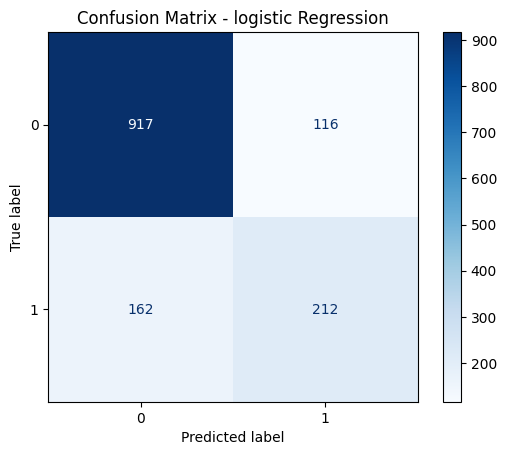

In [7]:
# Evaluation metrics
#print detailed performance on test set
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - logistic Regression')
plt.show

In [10]:
from imblearn.over_sampling import SMOTE
print("SMOTE import successful 🚀")

ModuleNotFoundError: No module named 'imblearn'

In [8]:
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with fixed random state for reproducibility
smote = SMOTE(random_state=42)
# Apply SMOTE only on the training data
# It will generate new synthetic examples of the minority class (churners) to balance the dataset
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution before and after using SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

ModuleNotFoundError: No module named 'imblearn'